In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('D:\Codes\Cognizance2022\AI Tasks\Cognizance-AI-Tasks\Task-6\marketing_campaign.csv', sep = '\t').dropna()
df = df.drop(["ID", "Dt_Customer"], axis = 1) # Removing data that may create discrepencies in handling
print(df["Education"].unique())
edu = {'Graduation':0,
        'PhD':1,
        'Master':2,
        'Basic':3,
        '2n Cycle': 4}
df["Education"].replace(edu, inplace= True)
marital = df["Marital_Status"].unique()
print(marital)
mar = {}
for i in range(len(marital)):
    mar[marital[i]] = i
df["Marital_Status"].replace(mar, inplace= True)
df

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,0,0,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,0,0,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,0,1,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,0,1,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,1,2,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0,2,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,1,1,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,0,3,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,2,1,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [10]:
scaler = StandardScaler()
feature = scaler.fit_transform(df)
X_normalized = normalize(feature)
X_normalized = pd.DataFrame(X_normalized)
X_normalized

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.165306,-0.130826,-0.234517,0.039224,-0.137923,-0.155675,0.052038,0.163929,0.259650,0.283244,...,0.116170,-0.047219,-0.047375,-0.047062,-0.043849,-0.019631,-0.016391,0.0,0.0,0.398492
1,-0.346182,-0.218516,-0.391709,-0.065654,0.291080,0.254449,-0.106505,-0.244081,-0.178389,-0.200965,...,-0.036828,-0.078869,-0.079129,-0.078607,-0.073239,-0.032790,-0.027378,0.0,0.0,-0.117707
2,-0.095968,-0.234994,-0.140753,0.231619,-0.247742,-0.279628,-0.239342,0.107915,0.171322,-0.053690,...,-0.163742,-0.084816,-0.085097,-0.084535,-0.078762,-0.035263,-0.029442,0.0,0.0,-0.126583
3,0.381139,-0.234889,-0.140690,-0.306060,0.312889,-0.279503,-0.239234,-0.262368,-0.169067,-0.197238,...,0.084494,-0.084778,-0.085058,-0.084497,-0.078727,-0.035247,-0.029429,0.0,0.0,-0.126526
4,0.339414,0.005159,0.155025,0.080217,0.347267,-0.310212,0.519064,-0.130791,0.139699,-0.072966,...,-0.043937,-0.094093,-0.094404,-0.093781,-0.087377,-0.039119,-0.032662,0.0,0.0,-0.140428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.028473,-0.146319,0.087010,0.066843,-0.154257,0.170380,-0.019509,0.224467,0.078408,0.012541,...,-0.024660,-0.052811,-0.052985,-0.052636,-0.049041,-0.021956,-0.018332,0.0,0.0,-0.078817
2212,-0.303954,0.002466,-0.074632,0.074621,0.463318,0.145091,0.038533,0.047755,-0.105732,-0.097511,...,0.110643,-0.044972,-0.045121,-0.044823,0.609965,-0.018697,-0.015611,0.0,0.0,-0.067118
2213,0.185274,-0.142305,0.254481,0.034285,-0.150025,-0.169334,0.264445,0.325866,0.099165,0.040649,...,0.051190,-0.051362,0.644777,-0.051192,-0.047696,-0.021354,-0.017829,0.0,0.0,-0.076655
2214,-0.320723,0.243290,-0.140174,0.202461,-0.246723,0.272511,-0.424796,0.109249,0.027456,0.062838,...,-0.286695,-0.084467,-0.084746,-0.084187,-0.078438,-0.035118,-0.029321,0.0,0.0,-0.126062


In [38]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,0.721050,-0.230547
1,-0.559212,0.201467
2,0.637643,-0.134156
3,-0.705829,-0.374846
4,-0.056916,-0.184846


In [49]:
db_default = DBSCAN(eps = 0.0375, min_samples = 29).fit(X_principal)
labels = db_default.labels_
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

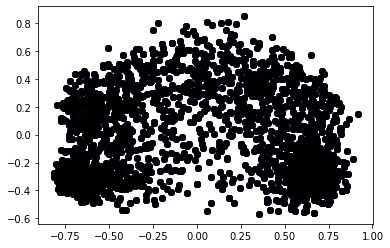

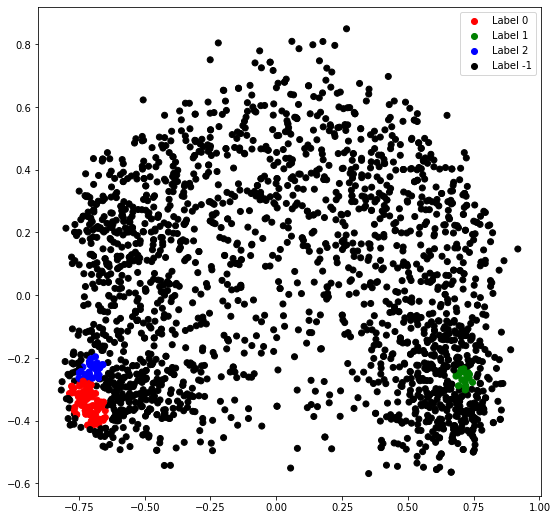

In [50]:

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()